In [233]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing

In [234]:
import pandas as pd
data = pd.read_csv (r"heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [235]:
#first few rows
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2. Data Pre-Processing
Data Type and conversion

Data Manipulation



### 2.1. Data Type and conversion

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [237]:
#Replacing spaces with null values in total charges column
data['output'] =data["output"].replace(" ",np.nan).astype(object) 


In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    object 
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


### 2.2. Data Manipulation

In [239]:
data.output.value_counts()  # 0= less chance of heart attack 
                            #1= more chance of heart attack



1    165
0    138
Name: output, dtype: int64

In [240]:
data.exng.value_counts()

0    204
1     99
Name: exng, dtype: int64

In [241]:
data.restecg .value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

# 3. Missing Value Identify & Treatment

In [242]:
# count the number of NaN values in each column
print(data.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


# 4.Outlier identify & Treatment

In [243]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:>

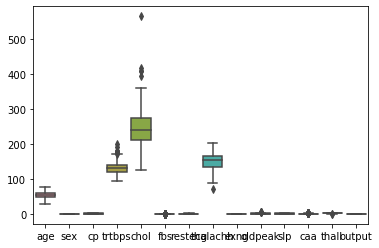

In [244]:
sns.boxplot(data=data)

In [245]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        data[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

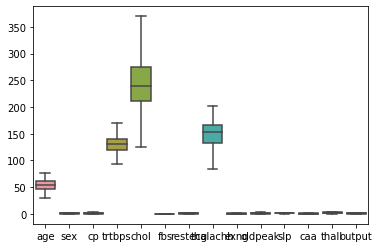

In [246]:
sns.boxplot(data=data)

# Data Visualization

In [247]:
import plotly.express as px

fig = px.pie(data,names='output',color='output',
             color_discrete_map={1:'red',
                                 0:'green'})
fig.show()

# 0= less chance of heart attack 
#1= more chance of heart attack


# 5.Labeling the data 

In [248]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1


In [249]:
data.select_dtypes(include=[np.number]).columns.tolist()

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

In [250]:
#  Numeric columns
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0


In [251]:
data_dummies = data[data.select_dtypes(include=['object']).columns.tolist()]
data_dummies.head(3)

,output
0,1
1,1
2,1


In [252]:
from sklearn.preprocessing import LabelEncoder
data_dummies=data_dummies.apply(LabelEncoder().fit_transform)
data_dummies.head(3)
# label in ascending order

,output
0,1
1,1
2,1


In [253]:
data = pd.concat([data_num, data_dummies],axis=1)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1


# Data Partition

In [254]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = data.drop('output', axis = 1)
Y = data[['output']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [255]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=3,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

# Importance Features

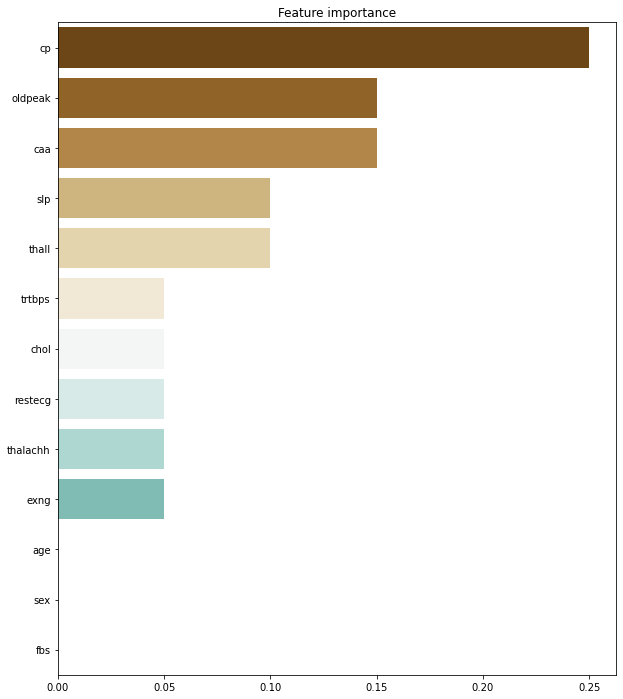

In [256]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [257]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [258]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


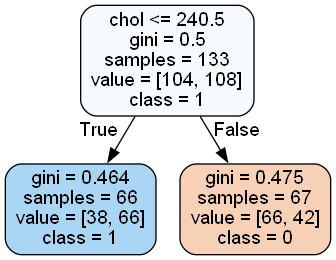

In [259]:
tree = Model.estimators_[1]  # specify the tree number   
output=['0','1'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=output,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset

In [260]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
111,57,1,2,150.0,126.0,0.0,1,173.0,0,0.2,2,1.0,3.0,1
156,47,1,2,130.0,253.0,0.0,1,179.0,0,0.0,2,0.0,2.0,1
209,59,1,0,140.0,177.0,0.0,1,162.0,1,0.0,2,1.0,3.0,0
58,34,1,3,118.0,182.0,0.0,0,174.0,0,0.0,2,0.0,2.0,1
48,53,0,2,128.0,216.0,0.0,0,115.0,0,0.0,2,0.0,0.5,1


In [261]:
train['predicted']=Model.predict(X_train)
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predicted
111,57,1,2,150.0,126.0,0.0,1,173.0,0,0.2,2,1.0,3.0,1,1
156,47,1,2,130.0,253.0,0.0,1,179.0,0,0.0,2,0.0,2.0,1,1
209,59,1,0,140.0,177.0,0.0,1,162.0,1,0.0,2,1.0,3.0,0,0
58,34,1,3,118.0,182.0,0.0,0,174.0,0,0.0,2,0.0,2.0,1,1
48,53,0,2,128.0,216.0,0.0,0,115.0,0,0.0,2,0.0,0.5,1,1


# Step 7 : Model Performance Metrics

In [262]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['output'], train['predicted'])
print(confusion_matrix)

[[ 75  23]
 [  8 106]]


In [263]:
Accuracy_Train=((73+99)/(212)*100)
print(Accuracy_Train)

81.13207547169812


In [264]:
from sklearn.metrics import classification_report
print(classification_report(train['output'], train['predicted']))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        98
           1       0.82      0.93      0.87       114

    accuracy                           0.85       212
   macro avg       0.86      0.85      0.85       212
weighted avg       0.86      0.85      0.85       212



# Step 8 : Predictions on Test Dataset

In [265]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
263,63,0,0,108.0,269.0,0.0,1,169.0,1,1.8,1,2.0,2.0,0
77,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0,1
163,38,1,2,138.0,175.0,0.0,1,173.0,0,0.0,2,2.5,2.0,1
206,59,1,0,110.0,239.0,0.0,0,142.0,1,1.2,1,1.0,3.0,0
167,62,0,0,140.0,268.0,0.0,0,160.0,0,3.6,0,2.0,2.0,0


In [266]:
test['predicted']=Model.predict(X_test)
test.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predicted
263,63,0,0,108.0,269.0,0.0,1,169.0,1,1.8,1,2.0,2.0,0,0
77,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0,1,1
163,38,1,2,138.0,175.0,0.0,1,173.0,0,0.0,2,2.5,2.0,1,1
206,59,1,0,110.0,239.0,0.0,0,142.0,1,1.2,1,1.0,3.0,0,0
167,62,0,0,140.0,268.0,0.0,0,160.0,0,3.6,0,2.0,2.0,0,0


# Step 9 : Model Performance Metrics on Test data 


In [267]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['predicted'],test['output'])
print(confusion_matrix)

[[27  4]
 [13 47]]


In [268]:
Accuracy_test=((26+43)/(91)*100)
Accuracy_test

75.82417582417582

In [269]:
from sklearn.metrics import classification_report
print(classification_report(test['output'], test['predicted']))

              precision    recall  f1-score   support

           0       0.87      0.68      0.76        40
           1       0.78      0.92      0.85        51

    accuracy                           0.81        91
   macro avg       0.83      0.80      0.80        91
weighted avg       0.82      0.81      0.81        91



In [271]:
import pickle
file=open("Rf.pkl",'wb')

pickle.dump(Model,file)